In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
pd.set_option('display.max_columns', None)

In [298]:
df = pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\dataset\gurgaon_properties_cleaned_v2.csv").drop_duplicates()

In [299]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [300]:
df.shape

(3660, 24)

In [301]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'noOfFloor', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

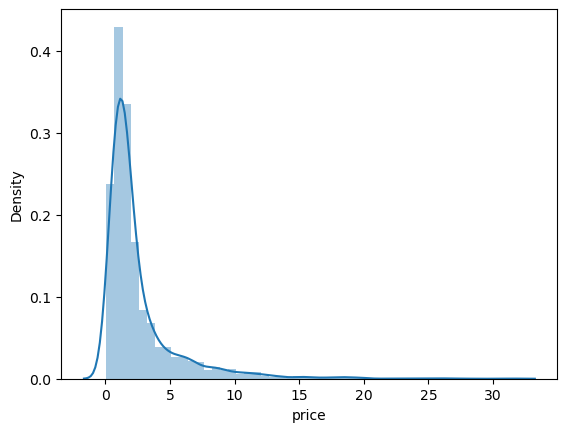

In [302]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

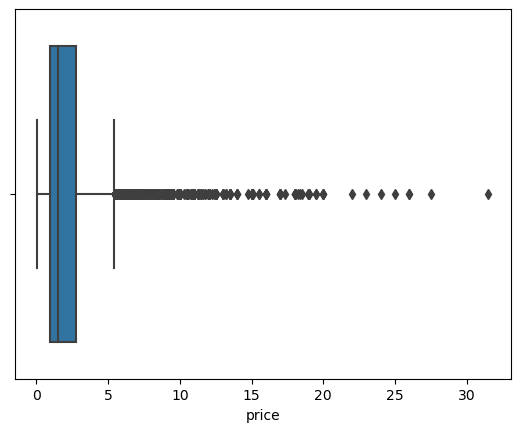

In [303]:
sns.boxplot(x=df['price'])

In [304]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [305]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3713,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,NaN,North-East,Moderately Old,3.0,NaN,9000.0,NaN,1,1,1,1,0,1,74
3478,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,NaN,North-East,Relatively New,3.0,NaN,11286.0,NaN,1,1,0,1,1,2,42
3469,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,NaN,North-West,New Property,4.0,NaN,400.0,350.0,1,1,1,1,0,2,72
3510,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,NaN,North-East,New Property,2.0,NaN,4545.0,NaN,1,1,0,1,1,2,138
3653,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,NaN,North,Moderately Old,2.0,NaN,1000.0,NaN,1,1,1,1,0,0,0
3434,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,NaN,North-East,Old Property,1.0,NaN,400.0,NaN,1,1,0,1,0,2,122
3639,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,NaN,South-West,Relatively New,2.0,NaN,9000.0,NaN,1,1,1,1,0,2,145
3452,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,NaN,NaN,Moderately Old,3.0,NaN,1000.0,NaN,0,1,0,0,0,0,54
2948,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,NaN,NaN,New Property,4.0,NaN,500.0,NaN,0,1,0,0,0,2,31
3427,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,NaN,North-East,New Property,4.0,NaN,4518.0,NaN,1,1,1,1,0,2,153


In [306]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

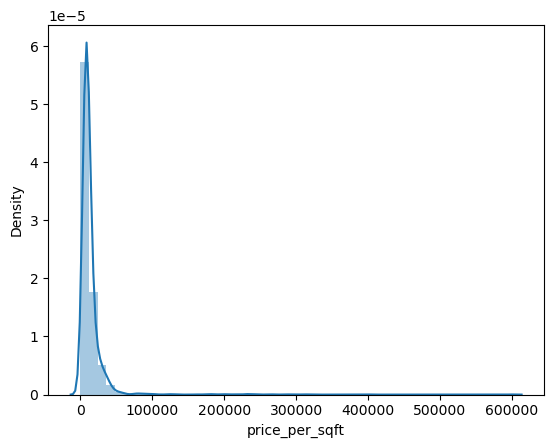

In [307]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

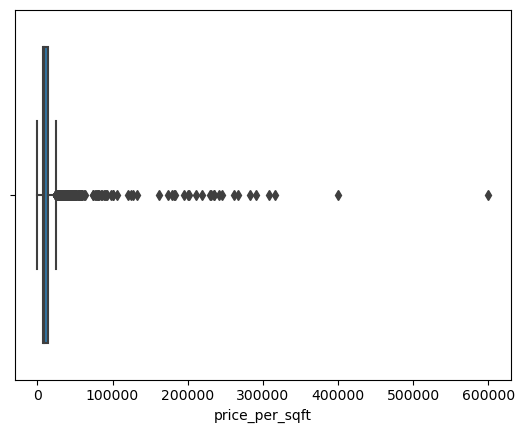

In [308]:
sns.boxplot(x=df['price_per_sqft'])

In [309]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [310]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [311]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [312]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.836158
std      12403.074329
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [313]:
df.update(outliers_sqft)

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

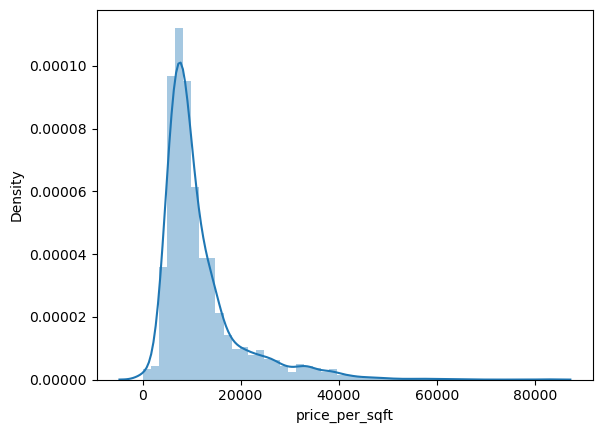

In [314]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

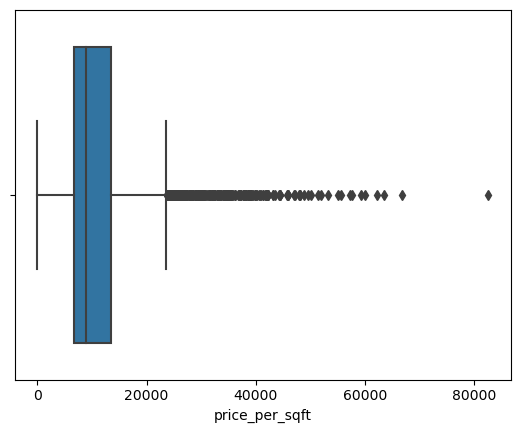

In [315]:
sns.boxplot(x=df['price_per_sqft'])

In [316]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2658,flat,unitech vistas,sector 70,9.00,57507.0,1565.026866,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,NaN,1565.0,NaN,0,0,0,0,0,0,0
3144,house,malibu towne,sector 47,8.50,53125.0,1600.000000,Built Up area: 1600 (148.64 sq.m.),12,12,3+,NaN,North,New Property,4.0,NaN,1600.0,NaN,0,0,0,0,0,2,99
3298,house,project housing board colony,sector 31,8.00,63492.0,1260.000000,Built Up area: 140 (117.06 sq.m.),2,1,0,NaN,NaN,Undefined,1.0,NaN,140.0,NaN,0,0,0,0,0,0,0
3411,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.000000,Plot area 1000(92.9 sq.m.),3,3,0,NaN,NaN,Moderately Old,1.0,NaN,1000.0,NaN,0,0,0,0,0,0,0
3426,house,independent,sector 26,14.75,51864.0,2844.000000,Plot area 316(264.22 sq.m.),16,20,3+,NaN,East,New Property,4.0,NaN,2844.0,NaN,1,1,1,1,0,2,153
3434,house,emaar the palm springs,sector 54,24.00,66667.0,3600.000000,Plot area 400(37.16 sq.m.),5,5,2,NaN,North-East,Old Property,1.0,NaN,400.0,NaN,1,1,0,1,0,2,122
3469,house,independent,sector 26,26.00,82540.0,3150.000000,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,NaN,North-West,New Property,4.0,NaN,400.0,350.0,1,1,1,1,0,2,72
3510,house,dlf city plots,sector 26,26.00,57206.0,4545.000000,Plot area 505(422.24 sq.m.),6,7,3+,NaN,North-East,New Property,2.0,NaN,4545.0,NaN,1,1,0,1,1,2,138
3603,house,emaar the palm springs,sector 54,14.00,62222.0,2250.000000,Plot area 250(209.03 sq.m.),4,5,3+,NaN,North,Old Property,2.0,NaN,2250.0,NaN,1,1,0,0,0,2,160
3666,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.000000,Plot area 360(301.01 sq.m.),4,4,3+,NaN,East,Moderately Old,3.0,NaN,3240.0,NaN,1,1,0,1,0,1,75


In [317]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

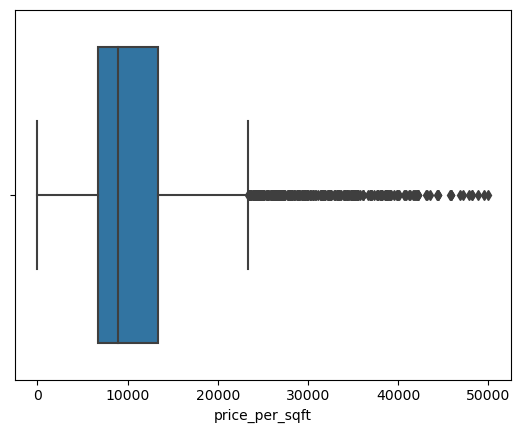

In [318]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

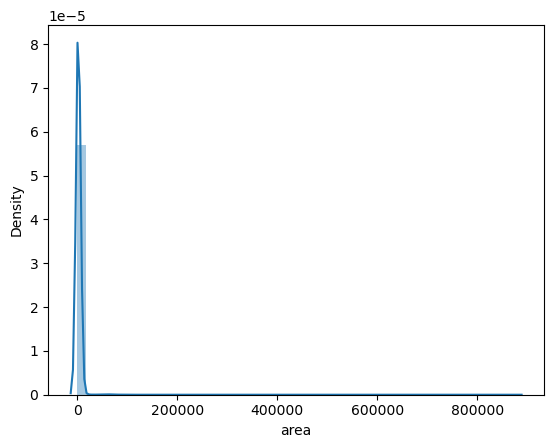

In [319]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

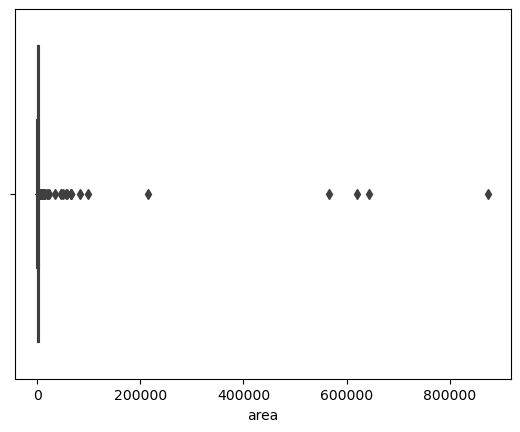

In [320]:
sns.boxplot(x=df['area'])

In [321]:
df['area'].describe()

count      3647.000000
mean       2947.776895
std       23208.191164
min         145.000000
25%        1261.995102
50%        1750.087504
75%        2349.995516
max      875000.000000
Name: area, dtype: float64

In [322]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
109,flat,signature the roselia,sector 95,0.45,7.0,642857.142857,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,NaN,569243.0,0,0,0,0,0,0,76
1290,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,NaN,607936.0,1,0,0,0,1,0,65
1949,flat,signature global solera 2,sector 107,0.51,9.0,566666.666667,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,NaN,514396.0,0,0,0,0,0,0,44
2407,flat,hcbs sports ville,sohna road road,0.35,4.0,875000.000000,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,NaN,737147.0,NaN,0,0,0,0,0,1,44
3248,house,independent,sector 50,5.00,232.0,215517.000000,Plot area 2(1011.71 sq.m.),6,5,3+,NaN,NaN,New Property,2.0,NaN,2.0,NaN,1,1,0,1,1,2,0


In [323]:
df = df[df['area'] < 100000]

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

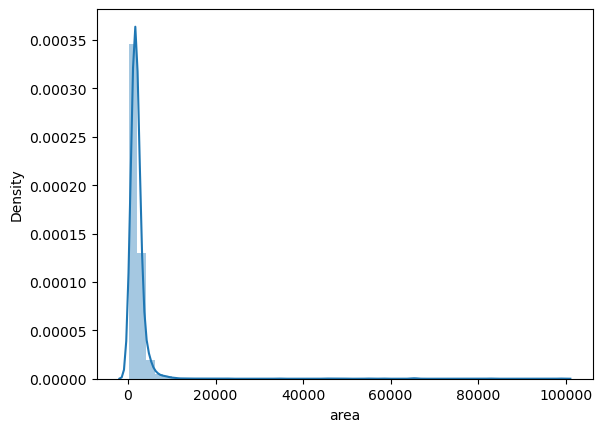

In [324]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

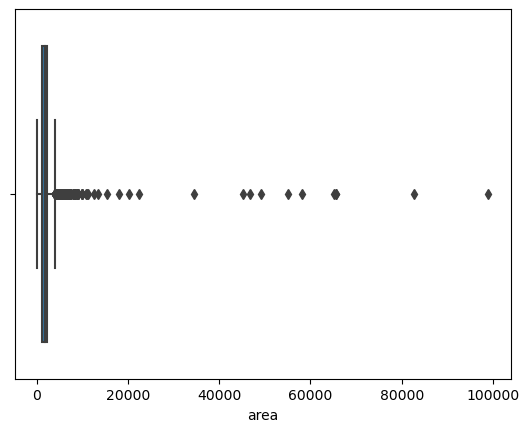

In [325]:
sns.boxplot(x=df['area'])

In [326]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3561,house,independent,sector 26,18.40,1859.0,98978.000000,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,NaN,South,Relatively New,4.0,NaN,NaN,11000.00,0,1,1,1,0,2,60
3217,house,ganpati heights apartment,sector 13,1.25,151.0,82781.000000,Plot area 115(7692.86 sq.m.),10,6,2,NaN,South-East,Old Property,3.0,NaN,115.0,NaN,0,0,0,0,1,0,7
2303,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,NaN,64529.00,1,0,0,0,0,0,15
1292,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,NaN,64412.00,0,0,0,0,0,0,51
3288,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.000000,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,NaN,NaN,Undefined,1.0,NaN,NaN,7250.00,0,0,0,0,0,0,0
78,flat,pyramid elite,sector 86,0.46,79.0,58227.848101,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,NaN,58141.00,0,0,0,0,0,0,15
1291,flat,rof ananda,sector 95,0.33,60.0,55000.000000,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,NaN,54917.00,0,0,0,0,0,0,37
1414,flat,signature the serenas,sohna road road,0.28,57.0,49122.807018,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,NaN,48811.00,1,0,0,0,0,0,37
3464,house,independent,sector 25,7.30,1560.0,46795.000000,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,NaN,North-West,Relatively New,3.0,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1288,flat,ramsons kshitij,sector 95,0.24,53.0,45283.018868,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [327]:
df.drop(index=[3561, 1292, 1796, 78, 1291, 1414, 1288, 1293,3040 ], inplace=True)

In [328]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3217,house,ganpati heights apartment,sector 13,1.25,151.0,82781.000000,Plot area 115(7692.86 sq.m.),10,6,2,NaN,South-East,Old Property,3.0,NaN,115.0,NaN,0,0,0,0,1,0,7
2303,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,NaN,64529.00,1,0,0,0,0,0,15
3288,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.000000,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,NaN,NaN,Undefined,1.0,NaN,NaN,7250.00,0,0,0,0,0,0,0
3464,house,independent,sector 25,7.30,1560.0,46795.000000,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,NaN,North-West,Relatively New,3.0,NaN,5800.0,5200.00,0,1,1,0,0,2,109
3047,house,independent,sector 57,6.25,2778.0,22498.000000,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,NaN,North-East,New Property,3.0,NaN,2660.0,2500.00,0,1,0,0,0,2,61
3524,house,independent,sector 43,5.50,2716.0,20250.000000,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,NaN,East,Moderately Old,3.0,NaN,2850.0,2250.00,1,1,0,1,1,2,123
2398,flat,godrej air,sector 85,2.50,1379.0,18129.079043,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,NaN,18122.00,1,0,0,1,1,2,44
3054,house,unitech aspen greens,sector 50,6.95,4490.0,15479.000000,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,NaN,North-East,Moderately Old,2.0,NaN,2160.0,1720.00,0,1,0,0,0,0,160
2800,flat,godrej icon,sector 88a,1.75,1384.0,12644.508671,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,NaN,1175.11,0,0,0,0,0,0,55
3478,house,independent,sector 43,27.50,24366.0,11286.000000,Plot area 1254(1048.5 sq.m.),6,7,3+,NaN,North-East,Relatively New,3.0,NaN,11286.0,NaN,1,1,0,1,1,2,42


In [329]:
df.loc[3217,'area'] = 115*9
df.loc[3288,'area'] = 7250
df.loc[2303,'area'] = 5800
df.loc[3464,'area'] = 2660
df.loc[3524,'area'] = 2850
df.loc[2398,'area'] = 1812
df.loc[3054,'area'] = 2160
df.loc[2800,'area'] = 1175

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

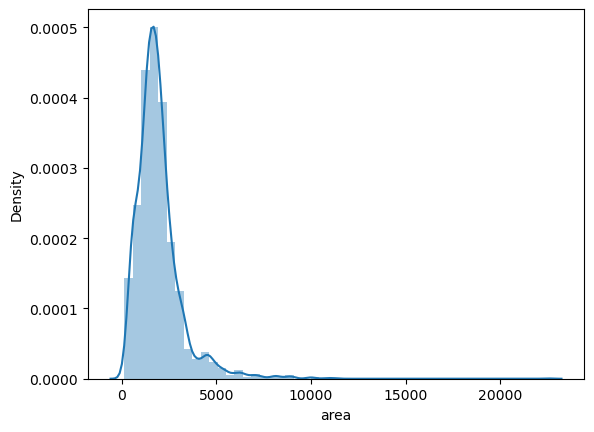

In [330]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

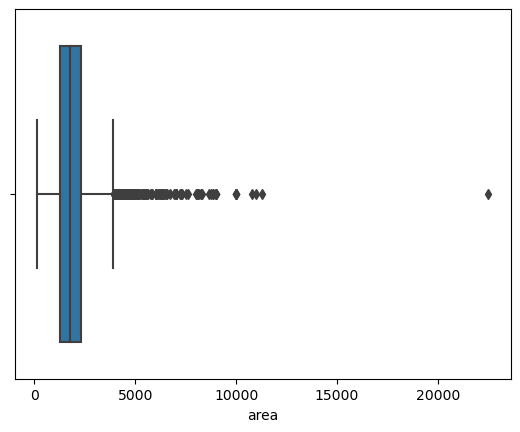

In [331]:
sns.boxplot(x=df['area'])

In [332]:
df['area'].describe()

count     3633.000000
mean      1956.086545
std       1262.604826
min        145.000000
25%       1260.051922
50%       1747.040139
75%       2329.066753
max      22498.000000
Name: area, dtype: float64

### Bedroom

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

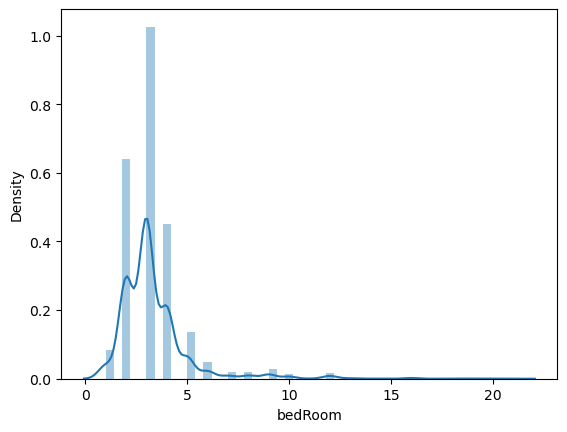

In [333]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

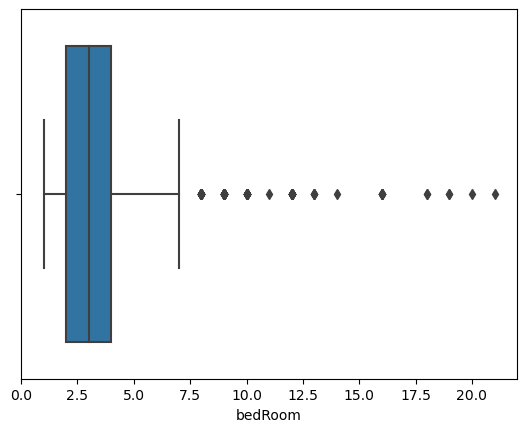

In [334]:
sns.boxplot(x=df['bedRoom'])

In [335]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333333
std         1.830160
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [336]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2944,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,NaN,North,Relatively New,5.0,NaN,1161.0,NaN,0,1,0,0,0,1,49
2946,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,NaN,East,Relatively New,4.0,NaN,1152.0,NaN,0,1,0,0,0,1,22
3395,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,NaN,North-West,Relatively New,5.0,NaN,7500.0,NaN,1,0,1,0,0,0,68
3068,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,NaN,North-West,Relatively New,4.0,NaN,1622.0,NaN,1,1,1,1,0,0,74
3649,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,NaN,South-West,Relatively New,4.0,NaN,1440.0,NaN,0,1,0,0,0,1,70
3048,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,NaN,North-East,Relatively New,4.0,NaN,1503.0,NaN,0,0,0,0,1,1,57
3667,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,NaN,NaN,New Property,4.0,NaN,3078.0,NaN,1,1,1,1,0,2,0
3629,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,NaN,West,New Property,4.0,NaN,2700.0,NaN,0,1,0,1,0,2,49
2980,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,NaN,North-West,Relatively New,4.0,NaN,2700.0,NaN,1,1,0,1,1,0,41
2982,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,NaN,North-East,New Property,4.0,NaN,2700.0,NaN,0,1,0,1,0,2,49


In [337]:
df = df[df['bedRoom'] <= 10]

In [338]:
df.shape

(3588, 24)

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

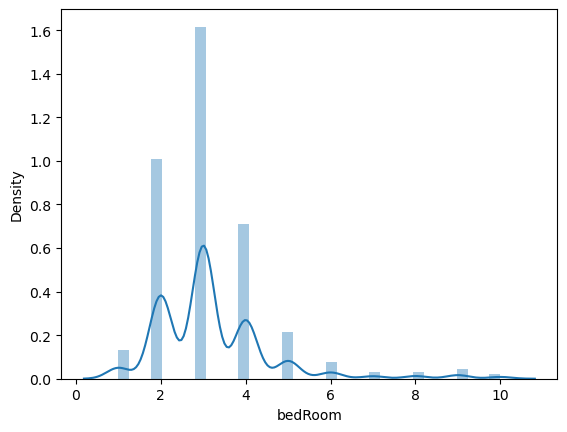

In [339]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

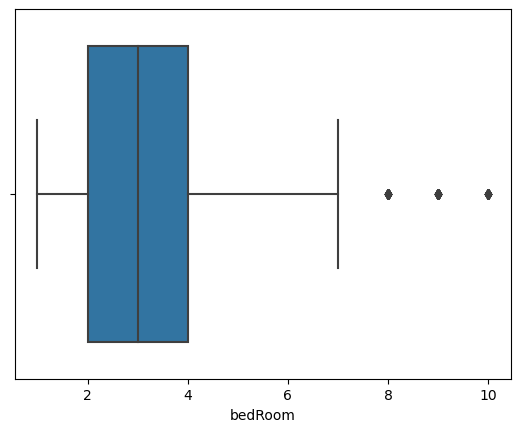

In [340]:
sns.boxplot(x=df['bedRoom'])

In [341]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203456
std         1.394109
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

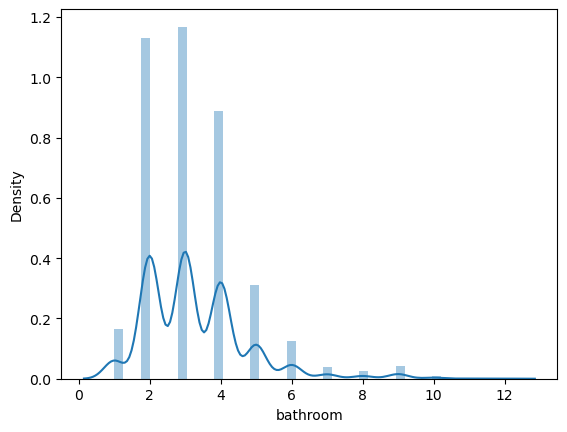

In [342]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

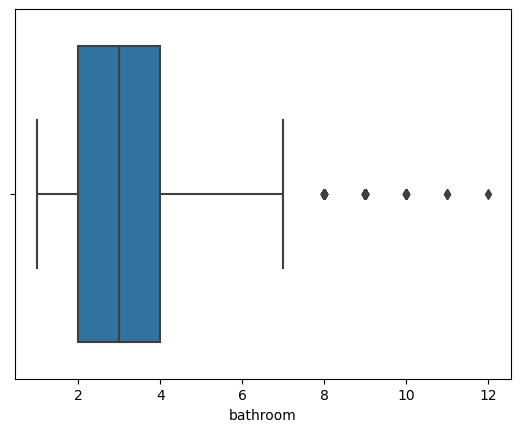

In [343]:
sns.boxplot(x=df['bathroom'])

In [344]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3373,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,NaN,North-East,Relatively New,3.0,NaN,6390.0,NaN,0,1,0,0,0,2,146
3318,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,NaN,South-East,Relatively New,4.0,NaN,7000.0,NaN,0,0,0,1,0,2,38
3372,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,NaN,East,Old Property,3.0,NaN,5000.0,NaN,1,1,0,1,1,2,39


In [345]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


### super built up area

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

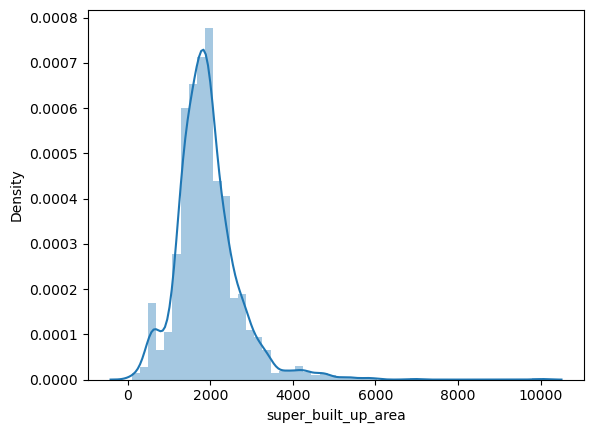

In [346]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

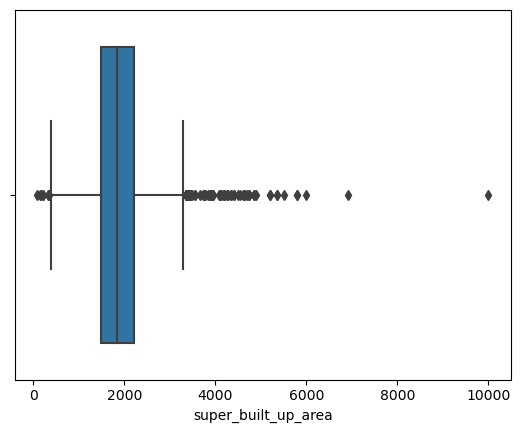

In [347]:
sns.boxplot(x=df['super_built_up_area'])

In [348]:
df['super_built_up_area'].describe()

count     1874.000000
mean      1925.263367
std        764.375333
min         89.000000
25%       1479.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [349]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
656,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.000000,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,NaN,10000.0,NaN,NaN,0,1,0,1,1,0,49
1527,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.024167,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,NaN,6926.0,NaN,NaN,0,1,0,0,0,2,140


### built up area

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

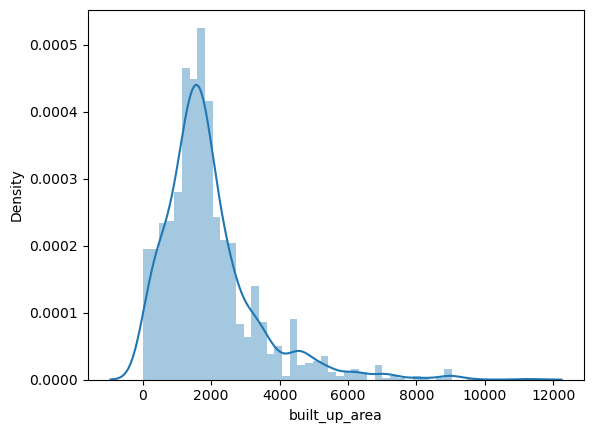

In [350]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

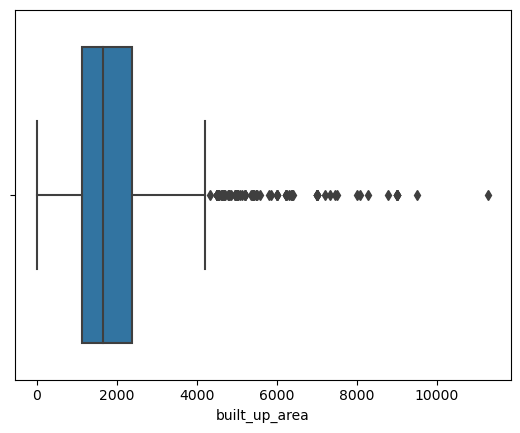

In [351]:
sns.boxplot(x=df['built_up_area'])

In [352]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3478,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,NaN,North-East,Relatively New,3.0,NaN,11286.0,NaN,1,1,0,1,1,2,42


### carpet area

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

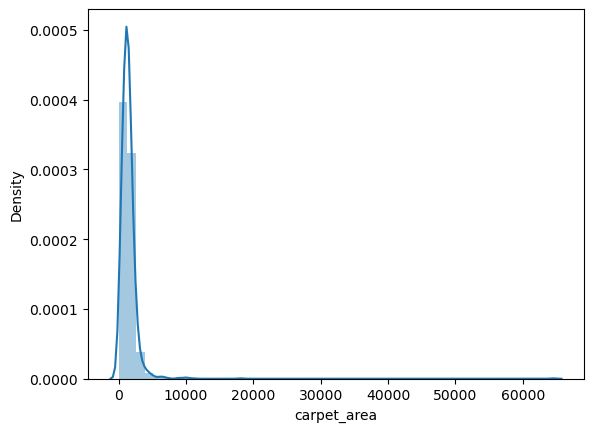

In [353]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

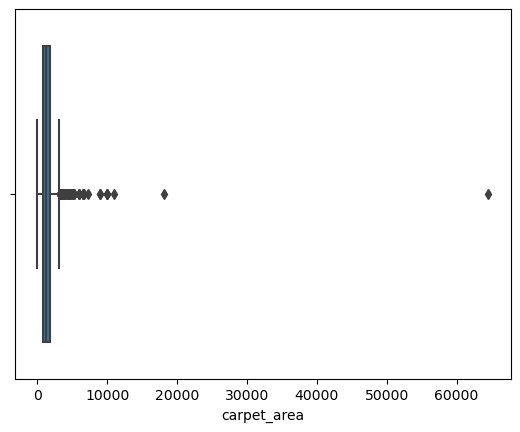

In [354]:
sns.boxplot(x=df['carpet_area'])

In [355]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1621,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0,1,0,0,0,0,60
2303,flat,rof ananda,sector 95,0.38,58.0,5800.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,NaN,64529.0,1,0,0,0,0,0,15
2398,flat,godrej air,sector 85,2.50,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [356]:
df.loc[2131,'carpet_area'] = 1812

In [357]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1621,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,NaN,11000.0,0,1,0,0,0,0,60
2303,flat,rof ananda,sector 95,0.38,58.0,5800.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,NaN,64529.0,1,0,0,0,0,0,15
2398,flat,godrej air,sector 85,2.50,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [358]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


C:\Users\asus\AppData\Local\Temp\ipykernel_8520\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

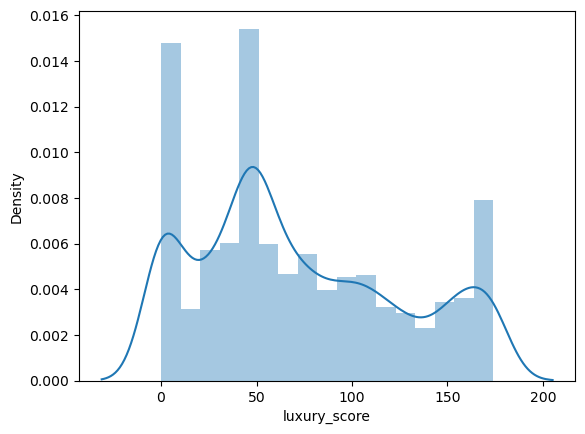

In [359]:
sns.distplot(df['luxury_score'])

<Axes: >

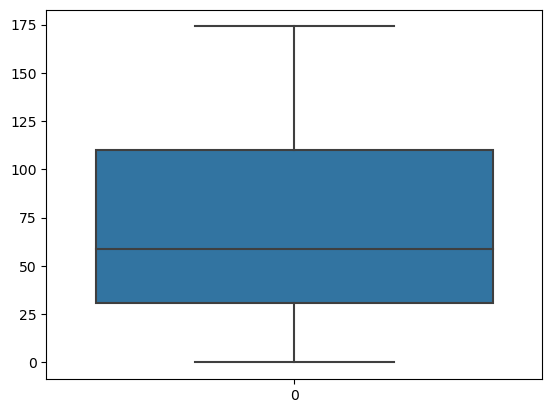

In [360]:
sns.boxplot(df['luxury_score'])

In [361]:
df.shape

(3588, 24)

In [362]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [363]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0


C:\Users\asus\AppData\Local\Temp\ipykernel_8520\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

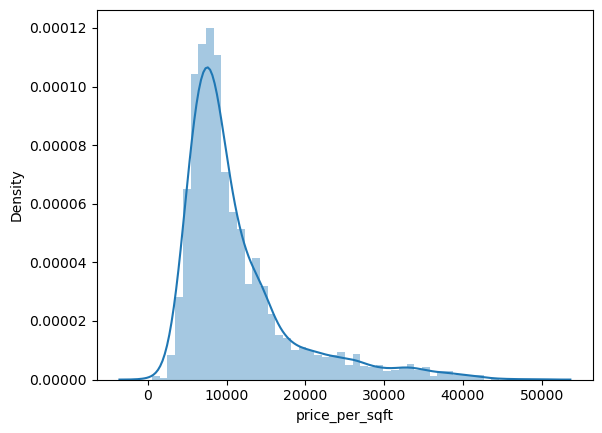

In [364]:
sns.distplot(df['price_per_sqft'])

<Axes: >

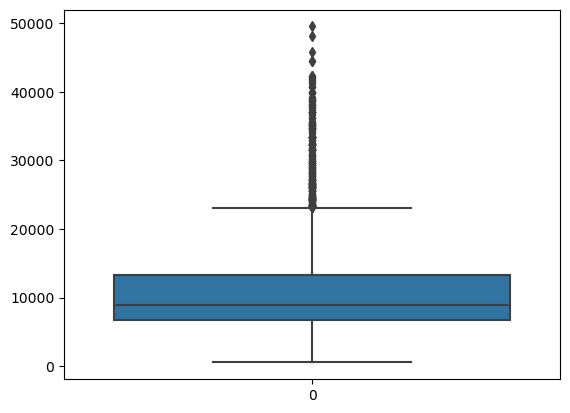

In [365]:
sns.boxplot(df['price_per_sqft'])

In [366]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3346,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,NaN,2844.0,NaN,1,1,1,1,0,1,0
3388,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,NaN,North,Undefined,3.0,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3463,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,NaN,East,Relatively New,2.0,NaN,4518.0,NaN,1,1,0,0,0,2,121
3564,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,NaN,East,Relatively New,4.0,NaN,2844.0,NaN,0,1,1,1,0,2,60
3569,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,NaN,West,Relatively New,3.0,NaN,4500.0,NaN,0,1,0,1,0,1,97
3648,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,NaN,East,Moderately Old,3.0,NaN,4500.0,NaN,1,1,1,1,0,2,103
3663,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,NaN,North,New Property,4.0,NaN,2700.0,NaN,0,0,0,1,0,2,7
3677,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,NaN,North-East,Relatively New,2.0,NaN,300.0,250.0,0,1,0,1,0,2,88
3780,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,NaN,East,New Property,5.0,NaN,115.0,100.0,0,0,0,0,1,2,44


In [367]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

183.33333333333334

In [368]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2957,house,independent,sector 38,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),7,7,3+,NaN,North-East,Relatively New,3.0,NaN,900.0,NaN,1,0,1,1,0,0,27
3060,house,independent,sector 12,1.00,8230.0,1215.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 ...,9,7,3+,NaN,North,Moderately Old,3.0,NaN,3750.0,NaN,0,0,1,1,0,0,7
3070,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6,4,3,NaN,North-East,Old Property,3.0,NaN,900.0,NaN,0,1,0,0,1,2,44
3072,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5,4,3,NaN,South-West,Relatively New,3.0,NaN,725.0,675.0,0,0,0,1,0,0,22
3074,house,independent,sector 105,0.60,13333.0,450.0,Built Up area: 450 (41.81 sq.m.),3,3,0,NaN,NaN,Undefined,3.0,NaN,450.0,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10,9,3+,NaN,North,Moderately Old,4.0,NaN,1620.0,NaN,1,1,0,0,0,2,36
3762,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,NaN,East,Relatively New,4.0,NaN,162.0,160.0,0,0,1,1,0,2,94
3764,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,NaN,East,Moderately Old,4.0,NaN,62.0,60.0,0,0,0,0,1,2,40
3774,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,NaN,East,Relatively New,3.0,NaN,165.0,164.0,0,0,0,1,1,2,41


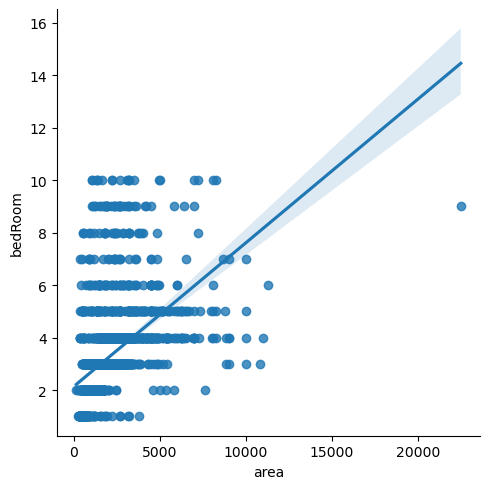

In [369]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [370]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [371]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2     47
3     36
5     28
6     17
4     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [372]:
df=df[df['area_room_ratio']>100]

In [373]:
outliers_df=df[(df['area_room_ratio']<250)&(df['bedRoom']>3)]

In [374]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\asus\AppData\Local\Temp\ipykernel_8520\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [375]:
df.update(outliers_df)

In [376]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [377]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2957,house,independent,sector 38,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),7,7,3+,NaN,North-East,Relatively New,3.0,NaN,900.0,NaN,1,0,1,1,0,0,27,128.571429
2964,house,independent,sector 25,7.60,38756.0,1961.0,Plot area 215(179.77 sq.m.),9,9,3,NaN,East,Relatively New,4.0,NaN,1935.0,NaN,1,0,1,1,0,2,84,217.888889
2990,house,uppal southend,sector 49,3.75,25562.0,1467.0,Plot area 163(136.29 sq.m.),6,6,3,NaN,East,Moderately Old,3.0,NaN,1467.0,NaN,0,0,0,0,1,0,49,244.500000
3060,house,independent,sector 12,1.00,8230.0,1215.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 ...,9,7,3+,NaN,North,Moderately Old,3.0,NaN,3750.0,NaN,0,0,1,1,0,0,7,135.000000
3070,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6,4,3,NaN,North-East,Old Property,3.0,NaN,900.0,NaN,0,1,0,0,1,2,44,150.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,NaN,East,Relatively New,4.0,NaN,162.0,160.0,0,0,1,1,0,2,94,182.250000
3774,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,NaN,East,Relatively New,3.0,NaN,165.0,164.0,0,0,0,1,1,2,41,166.000000
3780,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,NaN,East,New Property,5.0,NaN,115.0,100.0,0,0,0,0,1,2,44,125.000000
3781,house,iffco nagar and 17b rwa,sector 17,2.98,20566.0,1449.0,Plot area 161(134.62 sq.m.),6,6,3+,NaN,East,Relatively New,3.0,NaN,1449.0,NaN,1,0,0,1,0,0,78,241.500000


In [378]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)].shape

(73, 25)

In [379]:
df.shape

(3568, 25)

In [380]:
df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,noOfFloor,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,NaN,900.0,0,0,0,0,0,0,28,450.000000
1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,NaN,650.0,0,0,0,0,0,2,37,325.013001
2,flat,tulsiani easy in homes,sohna road road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,NaN,595.0,0,0,0,0,0,0,36,297.530497
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,NaN,1200.0,1,0,0,0,0,0,76,600.000000
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,NaN,1345.0,NaN,NaN,1,0,0,0,0,0,0,672.559570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,house,independent,sector 57,4.75,28788.0,1650.000000,Plot area 1600(148.64 sq.m.)Built Up area: 170...,3,3,3,NaN,North-West,Moderately Old,2.0,NaN,1700.0,1650.0,0,0,1,0,0,2,96,550.000000
3794,house,dlf city phase 1,sector 26,5.50,30556.0,1800.000000,Plot area 200(167.23 sq.m.),4,4,3,NaN,North-East,Moderately Old,2.0,NaN,1800.0,NaN,1,1,0,1,0,0,69,450.000000
3795,house,dlf city plots phase 2,sector 25,4.25,31481.0,1350.000000,Plot area 150(125.42 sq.m.),3,2,3,NaN,North,Old Property,2.0,NaN,1350.0,NaN,1,0,0,0,0,0,35,450.000000
3796,house,dlf city phase 1,sector 26,4.50,33333.0,1350.000000,Plot area 150(125.42 sq.m.),3,3,2,NaN,East,Moderately Old,2.0,NaN,1350.0,NaN,1,1,0,0,0,0,70,450.000000


In [381]:
df=df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

In [382]:
df.shape

(3495, 25)

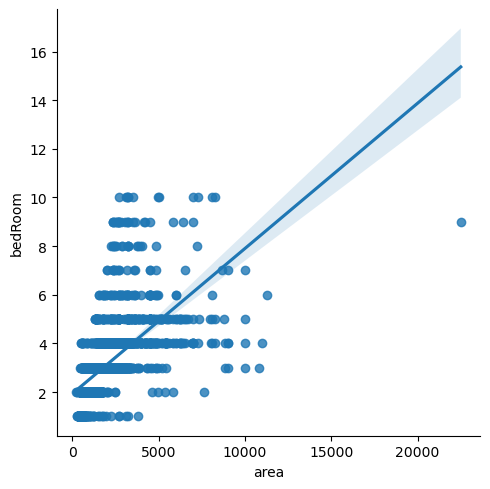

In [383]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [384]:
df.to_csv('gurgaon_properties_outliers_treated.csv',index=False)